# Market Basket Analysis - Grocery Data using Apriori Model
## The Apriori Model

* The Apriori Algorithm is the foundation of market basket analysis and is used to find items frequently bought together. This is very useful for retailers because:
    - Both X and Y can be placed on the same shelf so that buyers of one item would be prompted to buy the other.
    - Promotional discounts could be applied to just one out of the two items.
    - Advertisements on X could be targeted at buyers who purchase Y.
    - X and Y could be combined into a new product, such as having Y in flavors of X.
    
## Affinity analysis
- Affinity analysis is a data analysis and data mining technique that discovers **co-occurrence relationships** among activities performed by (or recorded about) specific individuals or groups. 
- In general, this can be applied to any process where agents can be uniquely identified and information about their activities can be recorded. In retail, affinity analysis is used to **perform market basket analysis**, in which retailers seek to understand the purchase behavior of customers.

## Association Rule Mining
- Market Basket Analysis is one of the key techniques used by large retailers to uncover associations between items. 
- It works by looking for **combinations of items that occur together frequently** in transactions. To put it another way, it allows retailers to identify relationships between the items that people buy.

## Apriori Algorithm
- Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. 
- It proceeds by identifying the **frequent individual items** in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.
    - **Support**: This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.
    - **Confidence**: This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.
    - **Lift**: This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is.

In [1]:
# Importing the modules
import numpy as np
import pandas as pd

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

import squarify
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from PyARMViz import PyARMViz
from PyARMViz.Rule import generate_rule_from_dict

sns.set()
matplotlib.rcParams['figure.figsize']=(36,36)
style.use('ggplot')

## 1. Loading the Dataset

In [2]:
basket = pd.read_csv('Groceries_dataset.csv')
basket

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## 2. Understanding the Dataset

In [3]:
basket['Date'] = pd.to_datetime(basket['Date'])

# Let get the data of purchases made by Member Number: 1808 in an accending order
basket[basket['Member_number'] == 1808].sort_values(by='Date')

C:\Users\Keith Fernandes\AppData\Local\Temp\ipykernel_5632\613344566.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  basket['Date'] = pd.to_datetime(basket['Date'])


,Member_number,Date,itemDescription
9090,1808,2014-11-29,meat
25239,1808,2014-11-29,whole milk
11488,1808,2014-12-15,sugar
27637,1808,2014-12-15,citrus fruit
38731,1808,2014-12-15,napkins
4355,1808,2015-02-04,long life bakery product
20504,1808,2015-02-04,semi-finished bread
0,1808,2015-07-21,tropical fruit
16149,1808,2015-07-21,rolls/buns
36088,1808,2015-07-21,candy


In [4]:
# Lets get the items purchased from each transaction (purchases made by a member on a single date)
#   We can achive that by:
#       1. Grouping all uniques combinations of Member_number and Date in the 'basket' DataFrame.
#       2. After grouping, select the 'itemDescription' column from each group
#       3. Create a list of all the items in each group (each group contains itemDescription i.e. items purchased in a single transaction)
#       4. Create a list of of all the lists created in the step before

transactions = basket.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()
print(len(transactions))
transactions[0]

14963


['whole milk', 'pastry', 'salty snack']

## 3. Preparing the Dataset

In [5]:
# Using the TransactionEncoder from the mlxtend module to encode our data
te = TransactionEncoder()
te_arry = te.fit(transactions).transform(transactions)
te_arry

array([[False, False, False, ...,  True, False, False],
       [False, False, False, ...,  True,  True, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
# Converting to a Pandas DataFrame
transactions = pd.DataFrame(te_arry, columns=te.columns_)
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Creating a count of the individual items purchased
pf = transactions.describe()

# Confirming if False is the top(most frequent/common) for all 167 columns (False indicates item wasn't purchased)
print(pf.loc['top'].unique())
pf

[False]


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963,...,14963,14963,14963,14963,14963,14963,14963,14963,14963,14963
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,...,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903


In [8]:
# Count of the individual items is count (non-null entires) minus freq (count of most common value in that column) 
pf.loc['number_of_purchases'] = pf.loc['count'] - pf.loc['freq']
a = pf.transpose()
item = pd.DataFrame(a['number_of_purchases']).reset_index()
item = item.sort_values('number_of_purchases', ascending=False) 

# Renaming the columns
item.columns = ['item', 'count']
item

,item,count
164,whole milk,2363
102,other vegetables,1827
122,rolls/buns,1646
138,soda,1453
165,yogurt,1285
...,...,...
124,rubbing alcohol,5
5,bags,4
4,baby cosmetics,3
79,kitchen utensil,1


## 4. Visualizing the Top 50 Items as a Treemap

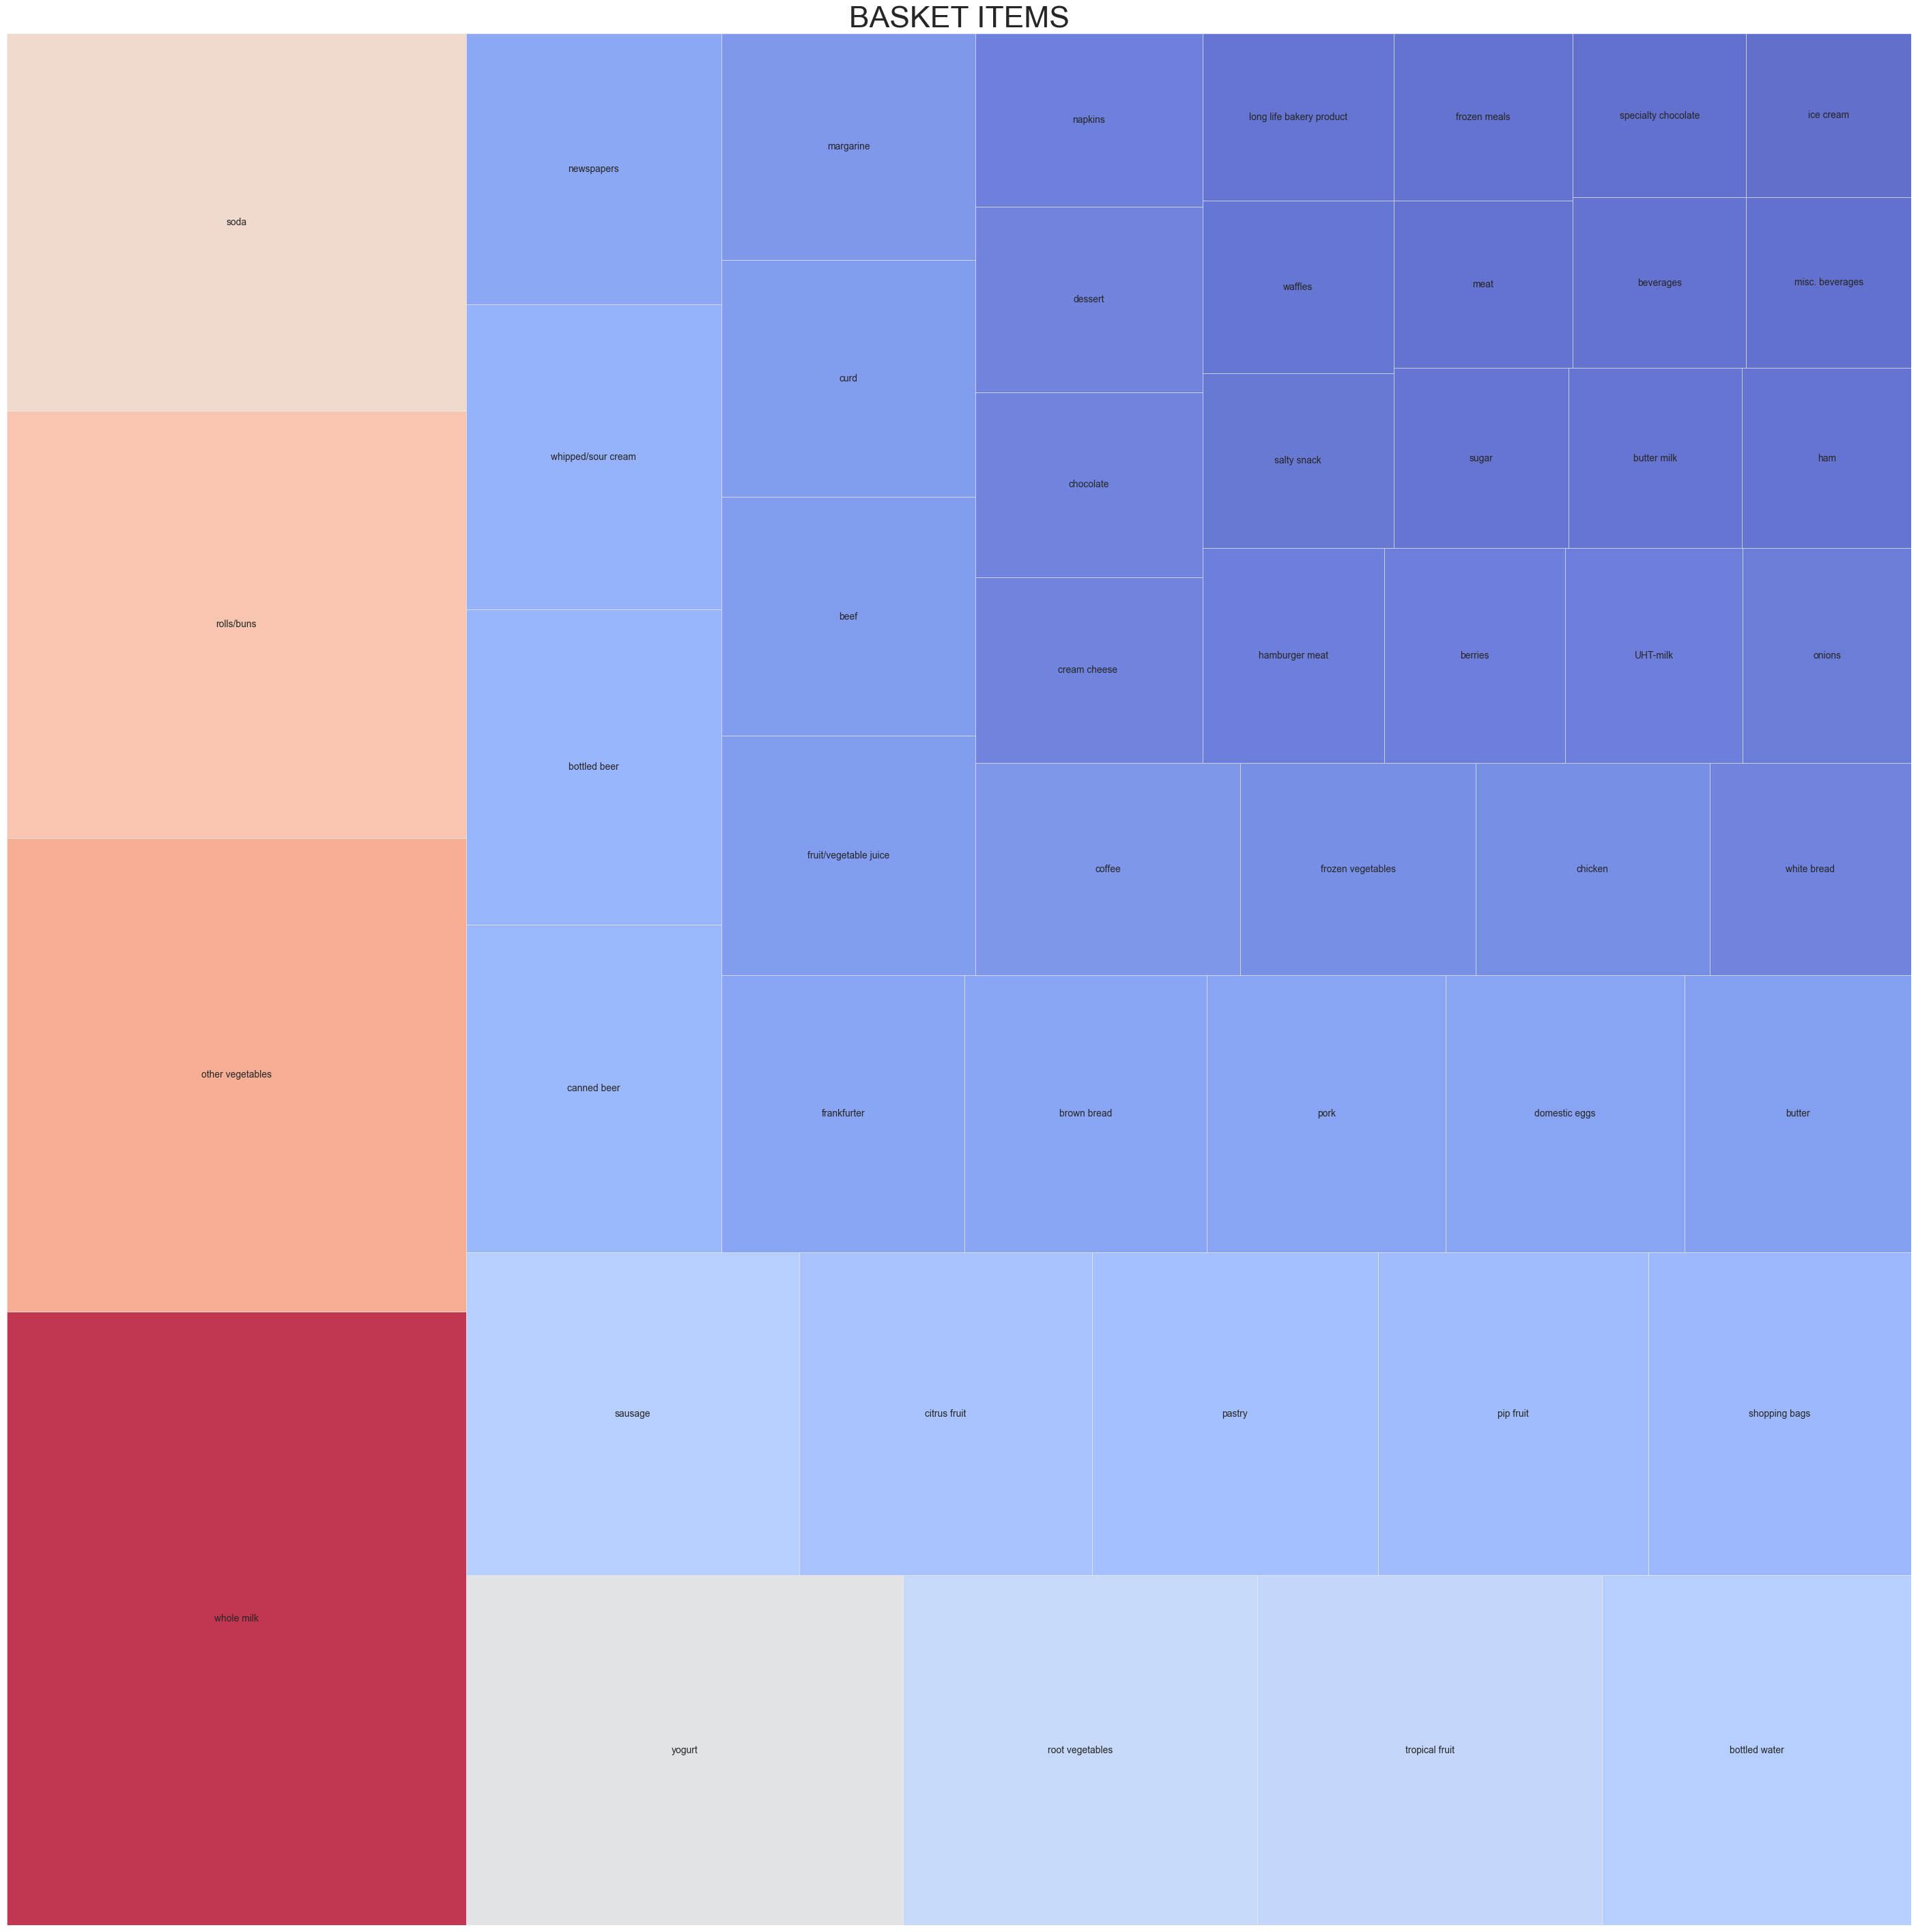

In [9]:
fig, ax = plt.subplots()

# Setting the color scheme
cmap = matplotlib.cm.coolwarm

# Getting the upper and lower bounds for the color mapping
mini = min(item['count'].head(50))
maxi = max(item['count'].head(50))

# Set out color mapping limits
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)

# Obtain the raw colors
colors = [cmap(norm(value)) for value in item['count'].head(50)]

# Create the TreeMap plot with Squarify
squarify.plot(sizes=item['count'].head(50), label=item['item'].head(50), alpha=0.8, color=colors)
plt.axis('off')
plt.title('BASKET ITEMS', fontsize=32)
ttl = ax.title
ttl.set_position([.5,1.05])

## 5. Using the Apriori Algorithm
**Association rules analysis** is a technique to uncover how items are associated to each other. There are three common ways to measure association.</br>

 - **Measure 1: Support.** This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears. In the Table above, the support of {apple} is 4 out of 8, or 50%. Itemsets can also contain multiple items. For instance, the support of {apple, beer, rice} is 2 out of 8, or 25%.</br>
 - **Measure 2: Confidence.** This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears. In Table 1, the confidence of {apple -> beer} is 3 out of 4, or 75%.</br>
 - **Measure 3: Lift.** This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. In Table 1, the lift of {apple -> beer} is 1,which implies no association between items. A lift value greater than 1 means that item Y is likely to be bought if item X is bought, while a value less than 1 means that item Y is unlikely to be bought if item X is bought.</br>


### Finding the frequent itemsets using the Apriori Module

In [10]:
frequent_itemsets = apriori(transactions, min_support=0.001, use_colnames=True, max_len=5)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))             # Length refers to the number of items in itemset (length of an item set)
frequent_itemsets

,support,itemsets,length
0,0.004010,(Instant food products),1
1,0.021386,(UHT-milk),1
2,0.001470,(abrasive cleaner),1
3,0.001938,(artif. sweetener),1
4,0.008087,(baking powder),1
...,...,...,...
745,0.001136,"(sausage, whole milk, rolls/buns)",3
746,0.001002,"(soda, whole milk, rolls/buns)",3
747,0.001337,"(whole milk, rolls/buns, yogurt)",3
748,0.001069,"(soda, whole milk, sausage)",3


The above table provides all the association rules for basket analysis

In [11]:
b = association_rules(frequent_itemsets, metric="lift", min_threshold=0.001)
b['uni'] = np.nan
b['ant'] = np.nan
b['con'] = np.nan
b['tot'] = 14963            # Total number of transactions

## 6. Vizualising the Data

In [12]:
transactions = basket.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

def trans():
    for t in transactions:
        yield t
        
        
def ant(x):
    cnt=0
    for t in trans():
        t= set(t)
        if x.intersection(x) == x:
            cnt = cnt+1
    return cnt

bb = b.values.tolist()
b

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,uni,ant,con,tot
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312,NaN,NaN,NaN,14963
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204,NaN,NaN,NaN,14963
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119,NaN,NaN,NaN,14963
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234,NaN,NaN,NaN,14963
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934,-0.254457,NaN,NaN,NaN,14963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,"(whole milk, yogurt)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219,0.548014,NaN,NaN,NaN,14963
1234,"(sausage, yogurt)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541,0.384877,NaN,NaN,NaN,14963
1235,(whole milk),"(sausage, yogurt)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596,0.454430,NaN,NaN,NaN,14963
1236,(sausage),"(whole milk, yogurt)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532,0.576701,NaN,NaN,NaN,14963


In [13]:
rules_dict = []
for bbb in bb:
    bbb[10] = ant(bbb[0])
    bbb[11] = ant(bbb[1])
    bbb[9] = ant(bbb[0].union(bbb[1]))
    diction = {
        'lhs': tuple(bbb[0]), 
        'rhs': tuple(bbb[1]),
        'count_full': bbb[9],
        'count_lhs': bbb[10],
        'count_rhs': bbb[11],
        'num_transactions': bbb[12]
    }
    rules_dict.append(diction)

In [14]:
rules = []
for rd in rules_dict:
    rules.append(generate_rule_from_dict(rd))

In [15]:
rules[10]

{soda} -> {UHT-milk}

In [28]:
PyARMViz.adjacency_parallel_category_plot(rules)